 判斷哪個參數及Model會比較合適, 對比之前的參數及Model

In [14]:
from sklearn import datasets  #各種的數據庫
from sklearn.model_selection import train_test_split  # cross validation
from sklearn.neighbors import KNeighborsClassifier

iris=datasets.load_iris()  
iris_X=iris.data  #iris的屬性 features
iris_y=iris.target  #iris的類別 target

X_train,X_test,y_train,y_test=train_test_split(iris_X,iris_y,random_state=4)
knn=KNeighborsClassifier(n_neighbors=5)  # n_neighbors=5 考慮附近五個的平均值
knn.fit(X_train,y_train)  #將X_train及y_train的data放入knn內, 自動完成train的步驟
print(knn.score(X_test,y_test))

0.9736842105263158


In [15]:
from sklearn.model_selection import cross_val_score  
knn=KNeighborsClassifier(n_neighbors=5) # n_neighbors=5 考慮附近五個的平均值
scores=cross_val_score(knn,iris_X,iris_y,cv=5,scoring='accuracy')  

In [16]:
print(scores) #分五組的值

[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [17]:
print(scores.mean()) #分五組的值平均

0.9733333333333334


# accuracy 查看數據(accuracy越高, 越精準)

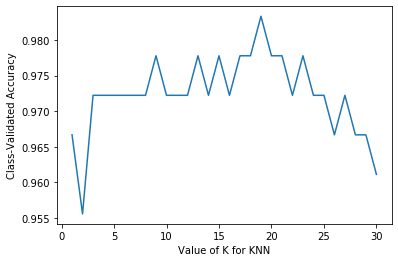

In [31]:
import matplotlib.pylab as plt
k_range=range(1,31)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,iris_X,iris_y,cv=30,scoring='accuracy')  #分類用  cv=分set數.越多越精準(在range內)  查看精確度
    k_scores.append(scores.mean())
plt.plot(k_range,k_scores)  # X=k_range    Y=k_scores
plt.xlabel('Value of K for KNN')  #x軸的標籤
plt.ylabel('Class-Validated Accuracy')  #Y軸的標籤
plt.show()  #查看K值為多少時, 精準度最高 / 誤差最小

# loss 查看數據誤差度(loss越小, 越精準)

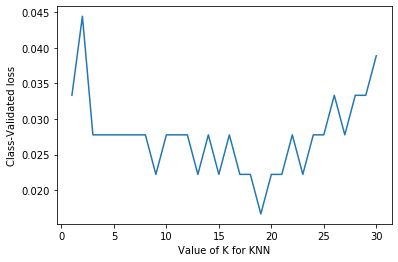

In [35]:
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
k_range=range(1,31)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    loss= - cross_val_score(knn,iris_X,iris_y,cv=30,scoring='neg_mean_squared_error') #回歸用   cv=分set數.越多越精準(在range內) 查看誤差度 #要加負號
    k_scores.append(loss.mean())
plt.plot(k_range,k_scores)  # X=k_range    Y=k_scores
plt.xlabel('Value of K for KNN')  #x軸的標籤
plt.ylabel('Class-Validated loss')  #Y軸的標籤
plt.show()  #查看K值為多少時, 精準度最高 / 誤差最小

# 手寫數字數據集- 可視化學習過程 (Training & cross validation)

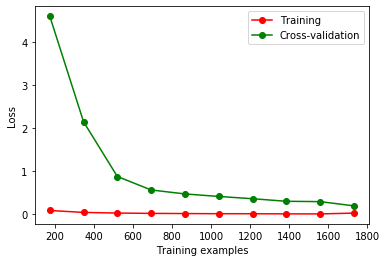

In [36]:
from sklearn.model_selection import learning_curve, GridSearchCV    # 可視化學習過程
from sklearn.datasets import load_digits   #手寫數字數據集 
from sklearn.svm import SVC  
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

digits=load_digits()
X=digits.data
y=digits.target
train_sizes,train_loss,test_loss=learning_curve(SVC(gamma=0.001),      #三種: train_sizes,train_loss,test_loss
                                                X,
                                                y,
                                                cv=30,  #cv=分set數 (在range內)
                                                scoring='neg_mean_squared_error',
                                                train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]) #紀錄10個點

train_loss_mean= - np.mean(train_loss,axis=1)   #因為Loss為負數,故加負號轉為正數
test_loss_mean= - np.mean(test_loss,axis=1)

plt.plot(train_sizes, #每一步驟
         train_loss_mean, #每一步training對應的Mean value
         'o-', # 
         color='r',label='Training')   
plt.plot(train_sizes, #每一步驟
         test_loss_mean,  #每一步交叉檢驗對應的Mean value
         'o-',
         color='g',label='Cross-validation')

plt.xlabel('Training examples')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

#當Training數越多,交叉檢驗的Loss就越少, 越接近training的結果

# 針對模型內的特定一個參數做測試, 查看哪一範圍的參數值最佳

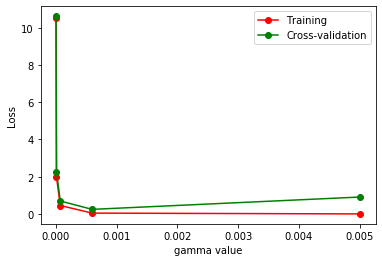

In [40]:
from sklearn.model_selection import validation_curve    # validation_curve 可視化檢驗過程
from sklearn.datasets import load_digits   #手寫數字數據集 
from sklearn.svm import SVC  
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

param_range=np.logspace(-6,-2.3,5)   #改變模型的參數 (SVC參數, 從-6 ~ -2.3, 取5個點)
digits=load_digits()
X=digits.data
y=digits.target
train_loss,test_loss=validation_curve(SVC(),  #兩種: train_loss,test_loss
                                      X,
                                      y,
                                      param_name='gamma', param_range=param_range, 
                                      #param_name要改變SVC的參數名   #param_range要改變SVC的參數值 #要設定在X,y之後
                                      cv=30,  #cv=分set數 (在range內)
                                      scoring='neg_mean_squared_error') 

train_loss_mean= - np.mean(train_loss,axis=1)   #因為Loss為負數,故加負號轉為正數
test_loss_mean= - np.mean(test_loss,axis=1)

plt.plot(param_range, #每一gamma值
         train_loss_mean, #每一步training對應的Mean value
         'o-', # 
         color='r',label='Training')   
plt.plot(param_range, #每一gamma值
         test_loss_mean,  #每一步交叉檢驗對應的Mean value
         'o-',
         color='g',label='Cross-validation')

plt.xlabel('gamma value')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

#當Gamma值為0時, 誤差值最高.
#0~0.007左右, 為最適gamma range
#0.008~0.005, 則為overfitting